## Reading the CSV File and Displaying the Dataframe

In [3]:
# importing pandas library
import pandas as pd

# Giving the path of the CSV file and stored in a variable name file
file = "C:\\Users\\himav\\4. Text Based Analysis\\TBA Classwork\\un-general-debates-blueprint.csv"

# Reading the CSV file and stored in a variable named called dataframe(df)
df = pd.read_csv(file)

# Printing the first 20 rows of the data from the CSV file
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Remove Stop words

In [4]:
# We will use the list of English stop words that are standard in python
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'both', 'between', 'nor', 'should', 'its', 'can', 'after', 'all', 'against', "couldn't", 'under', 'so', "weren't", 'above', 'our', 'at', 'aren', 'once', "you'd", 'am', 'itself', 'there', 'it', 'herself', 'was', "don't", 'out', 'those', 'own', 'for', 'as', 'about', 'until', 't', 'not', 'them', 'yourselves', 'ourselves', 'what', 'this', 'been', 'hers', 'hadn', 'of', 'same', 'ma', "you've", 'she', 'down', 'having', 'up', "shan't", 'now', "doesn't", "should've", 'himself', "that'll", 'whom', 'doesn', 'wouldn', 'when', 'he', 'your', "wouldn't", "aren't", 'these', 'an', 'from', 'by', "haven't", 'no', 'if', 'yours', 'd', 'mightn', 'does', 'into', "won't", 'has', 'just', 'didn', 'did', 'with', 'through', 're', 'will', 'too', 'other', 'i', 'very', 'more', "you're", 'm', 'that', "wasn't", "isn't", "mustn't", 'how', 'isn', 'ours', 'me', 'needn', 'before', 'their', 'weren', 've', 'are', 'wasn', 'won', 'myself', 'they', 'during', 'yourself', 'while', 'themselves', 'don', 'in', "hasn't", 'couldn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Function to tokenize

In [5]:
# Tokenizing a Function using a function tokenize()
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


## Function to remove stop words

In [6]:
# Removing the stop words using a function remove_stop()
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

## Let's make a Pipeline

In [7]:
# Making a Pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


## Run the Pipeline

In [8]:
# Running a pipeline
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## Put the word frequency in it's own dataframe for analysis

In [9]:
# put the word frequency in it’s own dataframe for analysis
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'


## Sort and display!

In [10]:
# Sorting and Displaying 10 values of the frequency dataframe
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## All Data wordcloud

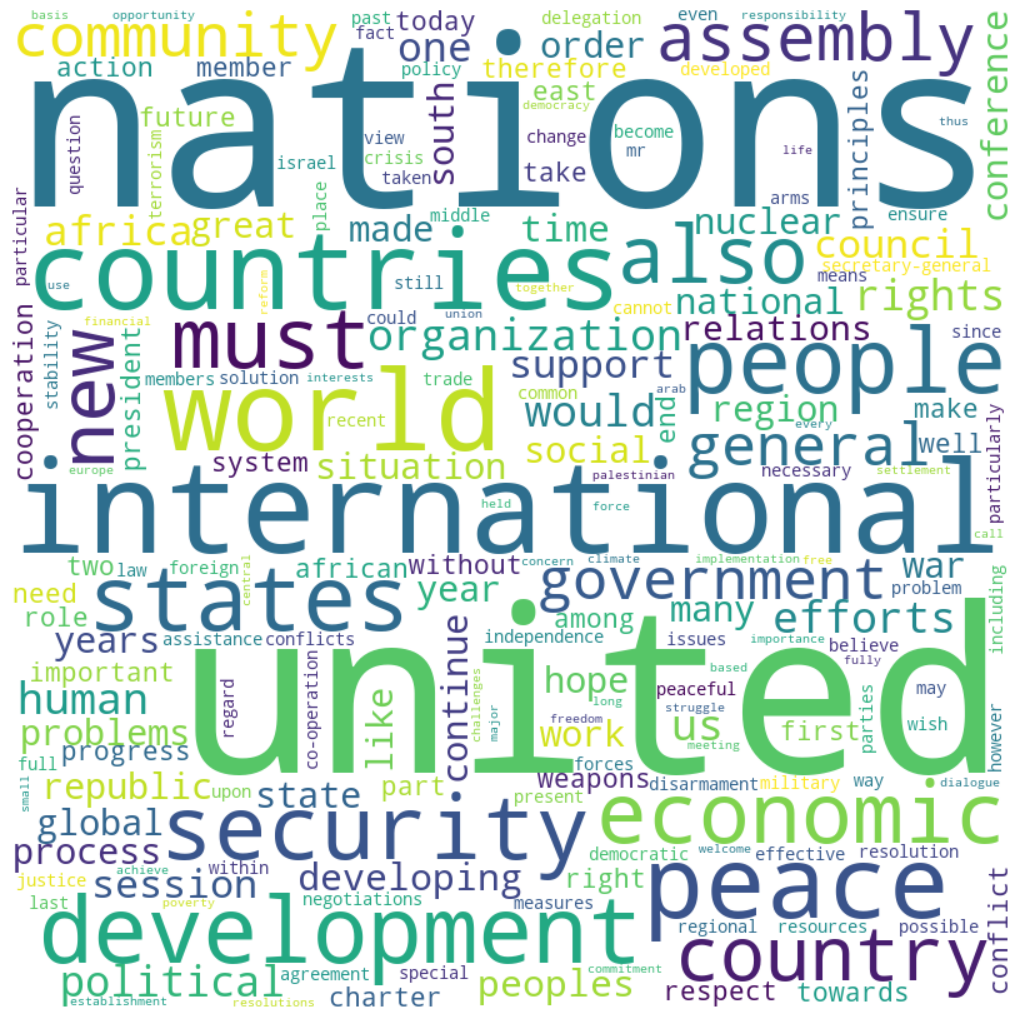

In [11]:
# Printing output with the needy requirements
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Create the WordCloud object with higher width and height
wc = WordCloud(background_color='white', width=800, height=800, margin=2)

# Fit words to the WordCloud object
wc.fit_words(freq_df['freq'].to_dict())

# Create a figure with a larger size
plt.figure(figsize=(10, 10), facecolor=None)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Do the TFIDF and do the Comparision 

In [12]:
# Do the TFIDF and do the Comparision
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
            tokens = doc if preprocess is None else preprocess(doc)
            counter.update(set(tokens))
            
    # count tokens
    counter = Counter()
    df[column].map(update)
    
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [13]:
# Describing the data of the frequency dataframe
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## Wordcloud

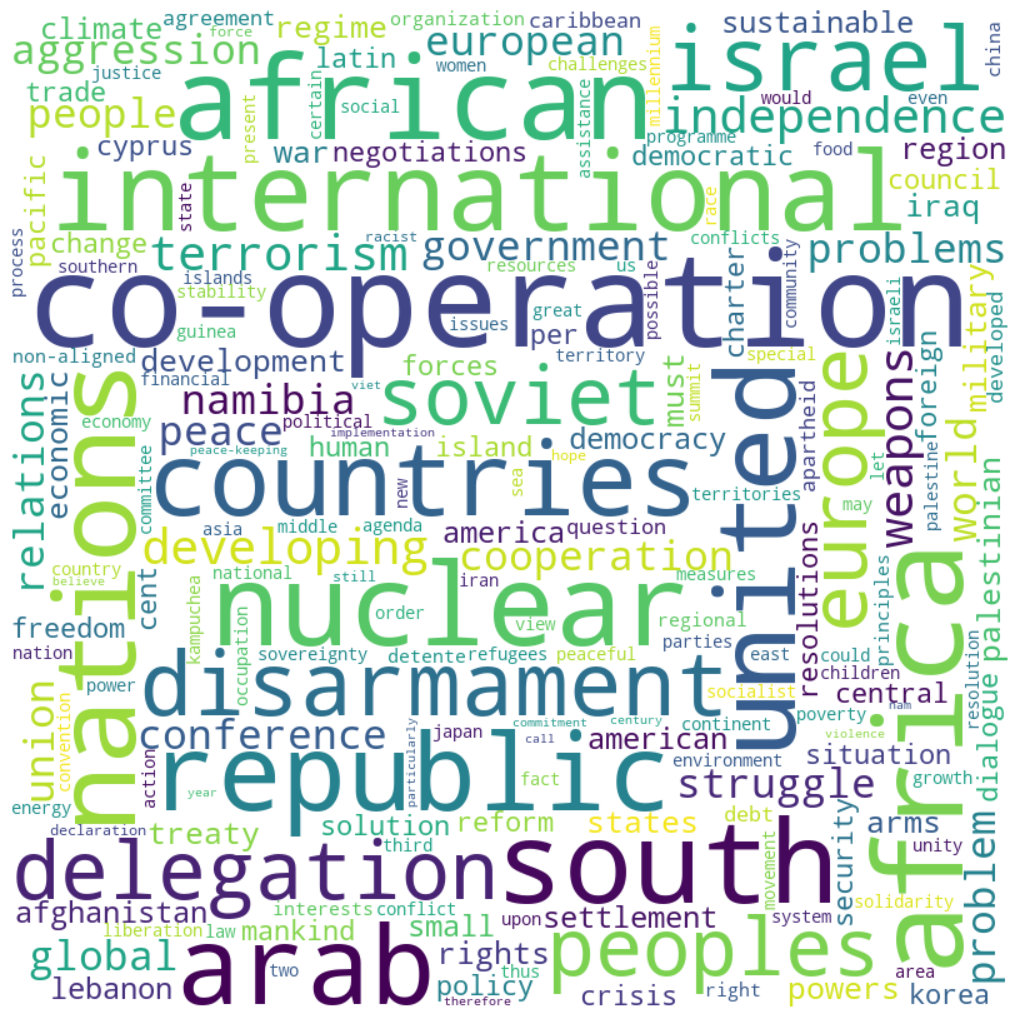

In [15]:
# Printing output with the needy requirements
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Increase the width and height for better resolution
wc = WordCloud(background_color='white', width=800, height=800, margin=2)

# Use the 'tfidf' values from your dataframe
wc.fit_words(freq_df['tfidf'].to_dict())

# Increase the figure size for better clarity
plt.figure(figsize=(10, 10), facecolor=None)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [16]:
# And also we can try other years or countries for fun to see the comparision between the TF and TFIDF
# import pandas as pd
# file = “ "
# df = pd.read_csv(file)
# df= df[df['year']==1970]
# df.head(20)

## Function to count the keywords

In [17]:
# Function to count the keywords
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## Function to groupby year

In [18]:
# Function to groupby year
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

## Finalizing the Heatmap

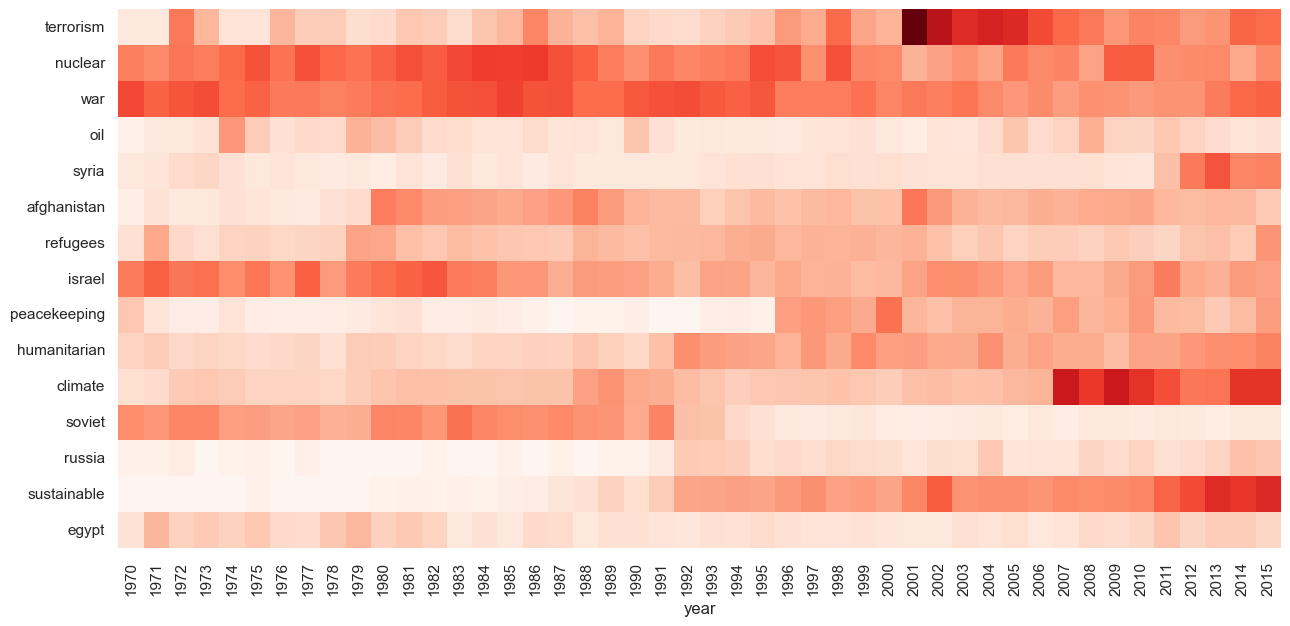

In [21]:
# Finalizing the Heatmap
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']
freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)